# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load data

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Basic stats

In [ ]:
df.shape

(400, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


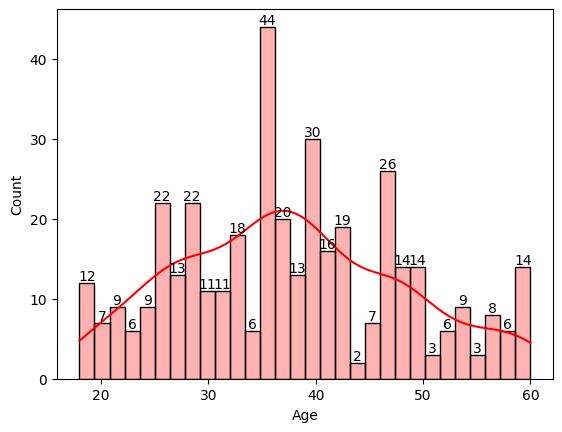

In [ ]:
histplot = sns.histplot(df['Age'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

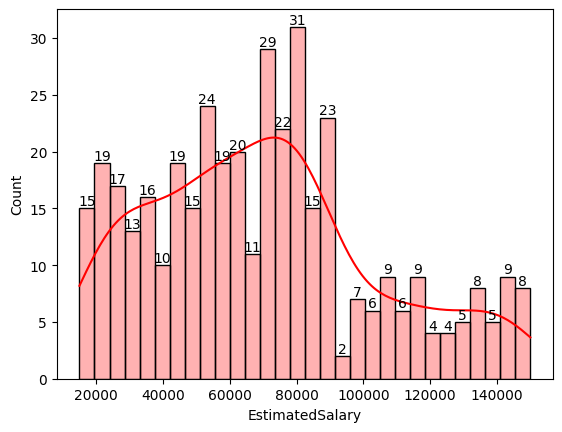

In [ ]:
histplot = sns.histplot(df['EstimatedSalary'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

In [ ]:
df["Gender"].value_counts()

,count
Gender,
Female,204
Male,196


In [ ]:
def gender_encoder(value):
    if (value == "Male"):
        return 1
    elif (value == "Female"):
        return 0
    else:
        return -1

In [ ]:
df["Gender"] = df["Gender"].apply(gender_encoder)

In [ ]:
df["Purchased"].value_counts()

,count
Purchased,
0,257
1,143


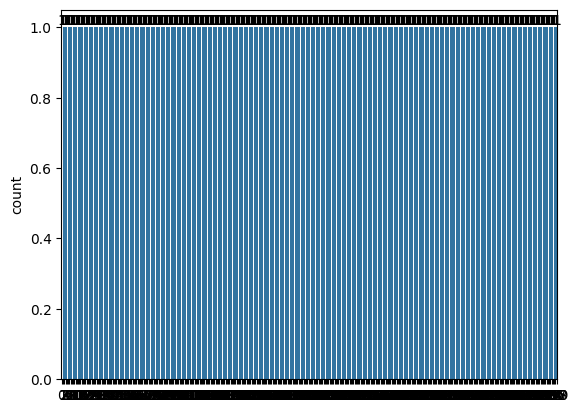

In [ ]:
countplot = sns.countplot(df["Purchased"])
for i in countplot.containers:
    countplot.bar_label(i,)
plt.show()

In [ ]:
countplot = sns.countplot(df["Purchased"], hue=df["Gender"], palette="twilight")
for i in countplot.containers:
    countplot.bar_label(i,)
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

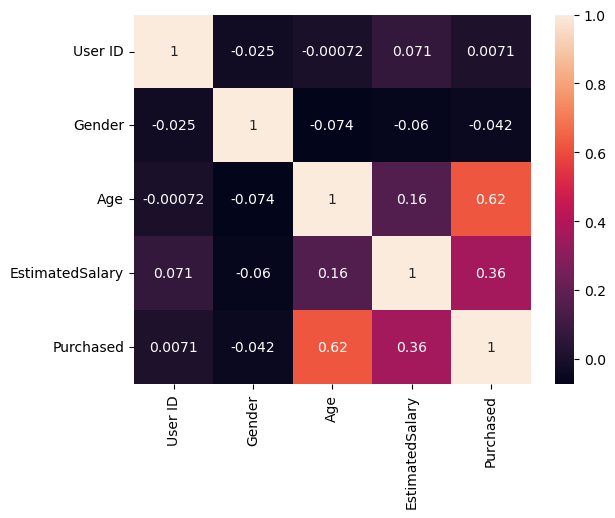

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# Data preparation

In [ ]:
x = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

# Model building

In [ ]:
model = LogisticRegression(n_jobs=-1)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(n_jobs=-1)

In [ ]:
y_pred = model.predict(x_test)

# Evalutation

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  2]
 [ 9 19]]


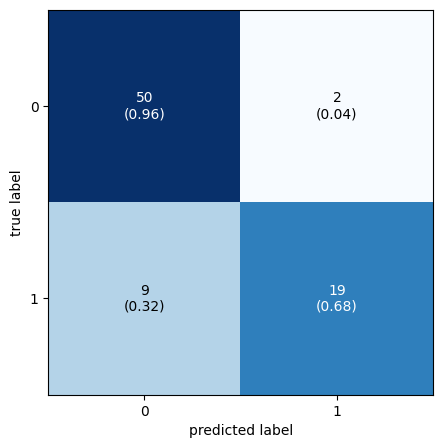

In [ ]:
plot_confusion_matrix(conf_mat=cm, figsize=(5,5), show_normed=True)
plt.show()

In [ ]:
print(f"TN value is {cm[0][0]}")
print(f"FP value is {cm[0][1]}")
print(f"FN value is {cm[1][0]}")
print(f"TP value is {cm[1][1]}")

TN value is 50
FP value is 2
FN value is 9
TP value is 19


In [ ]:
print(f"Accuracy score is {accuracy_score(y_test, y_pred)}")

Accuracy score is 0.8625


In [ ]:
print(f"Error rate is {1-accuracy_score(y_test, y_pred)}")

Error rate is 0.13749999999999996


In [ ]:
print(f"Precision score is {precision_score(y_test, y_pred)}")

Precision score is 0.9047619047619048


In [ ]:
print(f"Recall score is {recall_score(y_test, y_pred)}")

Recall score is 0.6785714285714286


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

